## Iron-Chromium Phase diagram calculation

This is done to verify the free energy functions given in the Andersson-Sundman paper

The molar free energies are given in the format:

$$G_m = X_{Cr}G^o_{Cr} + X_{Fe}G^o_{Fe} + RT(X_{Cr}ln(X_{Cr}) + X_{Fe}ln(X_{Fe})) + G^{xs}_m + G_M$$

Where:

$G^{xs}_m$ is the excess free energy given as a Redlich-Kister polynomial

$$G^{xs}_m = X_{Cr}X_{Fe} \sum_{\nu=0}L^\nu_{Cr,Fe}(X_{Cr} - X_{Fe})^\nu$$

And $G_M$ is the magnetic contribution to the free energy given by

$$G_M = RTln(1+\beta)f(\tau)$$

Where $\tau = \frac{T}{T_c}$

This contribution is considered only for the bcc phase. For the fcc phase, this is negligible.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# Define standard gibbs energies of components

R = 8.31448

def G0_Cr_bcc(T):
    
    # -439.0 to account for difference in standard enthalpies
    
    return (T<2180)*(-439.0 -8851.93 + 157.48*T -26.908*T*np.log(T) + 1.89435E-3 * T**2 -1.47721E-6*T**3 + 139250/T) +\
    (T>=2180)*(-34864+344.18*T-50*T*np.log(T)-2.88526E32/T**9)

# T < 1811
def G0_Fe_bcc(T):
    
    return (T<1811)*(1224.83 + 124.134*T - 23.5143*T*np.log(T) -4.3975E-3 * T**2 - 5.89269E-8*T**3 + 77358.5/T) +\
    (T>=1811)*(-25384.451+299.31255*T -46*T*np.log(T) +2.2960305E31/T**9)

def G0_Fe_fcc(T):
    
    return (T<1811)*(-237.57 + 132.416*T - 24.6643*T*np.log(T) -3.75752E-3*T**2 -5.89269E-8*T**3 + 77358.5/T)+\
    (T>=1811)*(-27098.266+300.25256*T - 46*T*np.log(T) + 2.78854E31/T**9)


def G0_Cr_fcc(T):
    
    return G0_Cr_bcc(T) + 7284+0.163*T

def G0_Fe_liq(T):
    
    return (T<1811)*(G0_Fe_bcc(T) + 12040.17 - 6.55843*T - 3.6751551E-21*T**7) +\
    (T>=1811)*(-10839.7+291.302*T-46*T*np.log(T))

def G0_Cr_liq(T):
    
    return (T<2180)*(G0_Cr_bcc(T) + 24335.93 - 11.42*T + 2.37615E-21*T**7) +\
    (T>=2180)*(-16459+335.618*T-50*T*np.log(T))


# Excess terms

def Gxs_bcc(x,T):
    
    return x*(1-x)*(20500-9.68*T)

def Gxs_fcc(x,T):
    
    return x*(1-x)*(10833-7.477*T+1410*(2*x-1))

def Gxs_liq(x,T):
    
    return x*(1-x)*(-14550+6.65*T)

# Magnetic Term

def GM(x,T):
    
    Tc = 1043*(1-x) - 311.5*x + x*(1-x)*(1650+550*(2*x-1))
    t = T/Tc
    b = 2.22*(1-x) - 0.008*x -x*(1-x)*0.85
    
    # different equations for t>1 and t<1
        
    f = (t>1)*(-6.417E-2/t**5 - 2.037E-3/t**15 -4.278E-4/t**25) +\
    (t<=1)*(-0.90530/t +1.0 + 0.153*t**3 - 6.8E-3*t**9 - 1.53E-3*t**15)

    
    return R*T*np.log(b+1)*f

In [3]:
# Calculate Free energies

def G_bcc(x,T):
    
    return x*G0_Cr_bcc(T) + (1-x)*G0_Fe_bcc(T) + R*T*(x*np.log(x)+(1-x)*np.log(1-x))+ Gxs_bcc(x,T) + GM(x,T)

def G_fcc(x,T):
    
    return x*G0_Cr_fcc(T) + (1-x)*G0_Fe_fcc(T) + R*T*(x*np.log(x)+(1-x)*np.log(1-x))+ Gxs_fcc(x,T)

def G_bcc_nomag(x,T):
    
    return x*G0_Cr_bcc(T) + (1-x)*G0_Fe_bcc(T) + R*T*(x*np.log(x)+(1-x)*np.log(1-x))+ Gxs_bcc(x,T)

def G_liq(x,T):
    
    return x*G0_Cr_liq(T) + (1-x)*G0_Fe_liq(T) + R*T*(x*np.log(x)+(1-x)*np.log(1-x)) + Gxs_liq(x,T)

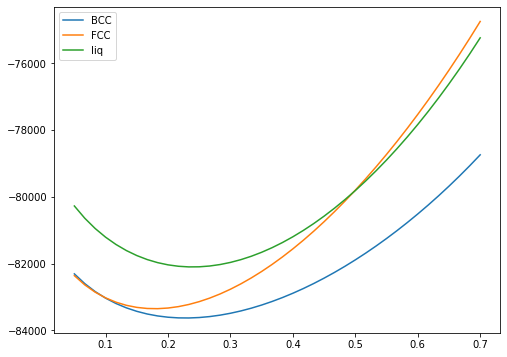

In [4]:
xs = np.linspace(0.05,0.7,40)
T = 1500

fig,ax = plt.subplots(figsize=(8,6))

ax.plot(xs,G_bcc(xs,T),label='BCC')
ax.plot(xs,G_fcc(xs,T),label='FCC')
ax.plot(xs,G_liq(xs,T),label='liq')
ax.legend()

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
@interact(T=(800,2400,50))
def plotfn(T):
    fig,ax = plt.subplots(figsize=(8,6))

    ax.plot(xs,G_bcc(xs,T),label='BCC')
    ax.plot(xs,G_bcc_nomag(xs,T),label='BCC_nomag',linestyle='--')
    ax.plot(xs,G_fcc(xs,T),label='FCC')
    ax.plot(xs,G_liq(xs,T),label='liq')
    ax.legend()

interactive(children=(IntSlider(value=1600, description='T', max=2400, min=800, step=50), Output()), _dom_clas…

### Parabolic approximation to free energies

[  31832.12999404  -15749.7270123  -110874.92457497] [  37280.53700698  -17421.58125112 -110938.74374566]
[  31832.12999404  -15749.7270123  -110874.92457497    1820.        ]


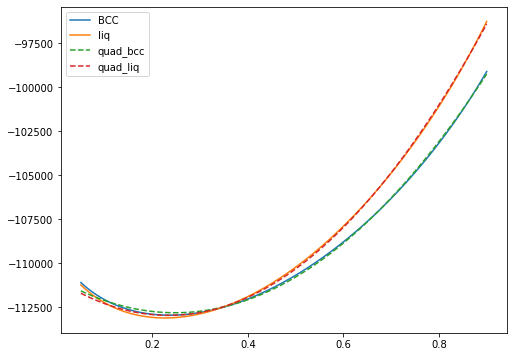

In [7]:
xs = np.linspace(0.05,0.9,200)
T = 1820
g_bcc = G_bcc(xs,T)
g_liq = G_liq(xs,T)

# Fit quadratic

coeffs_bcc = np.polyfit(xs,g_bcc,2)
coeffs_liq = np.polyfit(xs,g_liq,2)

def quad_bcc(x):
    
    return coeffs_bcc[0]*x**2 + coeffs_bcc[1]*x + coeffs_bcc[2]

def quad_liq(x):
    
    return coeffs_liq[0]*x**2 + coeffs_liq[1]*x + coeffs_liq[2]

print(coeffs_bcc,coeffs_liq)

print(np.hstack((coeffs_bcc,T)))

fig,ax = plt.subplots(figsize=(8,6))

ax.plot(xs,g_bcc,label='BCC')
ax.plot(xs,g_liq,label='liq')
ax.plot(xs,quad_bcc(xs),label='quad_bcc',linestyle='--')
ax.plot(xs,quad_liq(xs),label='quad_liq',linestyle='--')

ax.legend()

Alright, the free energies seem to make sense. Onto plot the phase diagrams, for confirmation.

In [8]:
# Expressions for derivatives

def dGdx_bcc(x,T):
    
    Tc = 1043*(1-x) - 311.5*x + x*(1-x)*(1650+550*(2*x-1))
    t = T/Tc
    
    b = 2.22*(1-x) - 0.008*x -x*(1-x)*0.85
    f = (t>1)*(-6.417E-2/t**5 - 2.037E-3/t**15 -4.278E-4/t**25) +\
    (t<=1)*(-0.90530/t +1.0 + 0.153*t**3 - 6.8E-3*t**9 - 1.53E-3*t**15)
    
    dbdx = -2.228 + (2*x-1)*0.85
    dGMdx = R*T/(b+1)*f*dbdx
    
    return G0_Cr_bcc(T) - G0_Fe_bcc(T) + R*T*(np.log(x/(1-x))) + (1-2*x)*(20500-9.68*T) + dGMdx

def dGdx_fcc(x,T):
    
    return G0_Cr_fcc(T) - G0_Fe_fcc(T) + R*T*(np.log(x/(1-x))) +\
    (1-2*x)*(10833-7.477*T+1410*(2*x-1)) + x*(1-x)*2*1410

## Gamma loop,  (1600-1200K)

In [9]:
def opt_fn(x_vec,T):
    
    x_fcc = x_vec[0]
    x_bcc = x_vec[1]
    
    f1 = dGdx_fcc(x_fcc,T) - dGdx_bcc(x_bcc,T)
    f2 = G_fcc(x_fcc,T) - G_bcc(x_bcc,T) - dGdx_fcc(x_fcc,T)*x_fcc + dGdx_bcc(x_bcc,T)*x_bcc
    
    return f1,f2

In [10]:
opt.fsolve(opt_fn, [0.12,0.13],1300)

array([0.12109292, 0.1464804 ])

In [11]:
Ts = np.linspace(1170,1530,100)
results=[]

for T in Ts:
    
    soln = opt.fsolve(opt_fn, [0.12,0.13],T)
    results.append(soln)

In [12]:
results = np.array(results)

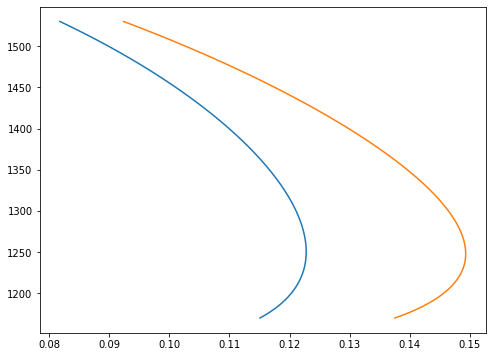

In [13]:
fig,ax = plt.subplots(figsize = (8,6))

ax.plot(results[:,0],Ts)
ax.plot(results[:,1],Ts)

## Solidus/Liquidus (1750-2200K)

In [14]:
def dGdx_liq(x,T):

    return G0_Cr_liq(T) - G0_Fe_liq(T) + R*T*(np.log(x/(1-x))) +\
    (1-2*x)*(-14450+6.65*T)

In [15]:
def opt_fn_liq(x_vec,T):
    
    x_liq = x_vec[0]
    x_bcc = x_vec[1]
    
    f1 = dGdx_liq(x_liq,T) - dGdx_bcc(x_bcc,T)
    f2 = G_liq(x_liq,T) - G_bcc(x_bcc,T) - dGdx_liq(x_liq,T)*x_liq + dGdx_bcc(x_bcc,T)*x_bcc
    
    return f1,f2

In [16]:
opt.fsolve(opt_fn_liq, [0.3,0.4],1800)

array([0.2707453 , 0.29025611])

In [17]:
Ts = np.linspace(1790,2120,301)
results=[]

for T in Ts:
    
    soln = opt.fsolve(opt_fn_liq, [0.38+(T-1825)/225*0.27,0.4+(T-1825)/255*0.3],T)
    results.append(soln)

In [18]:
results = np.array(results)

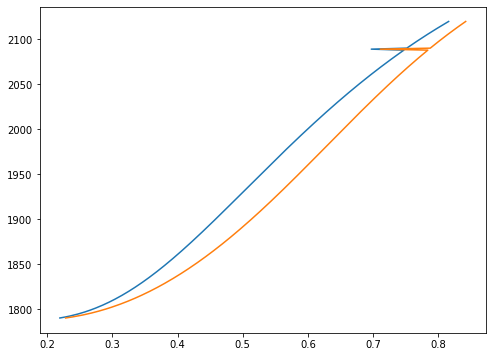

In [19]:
fig,ax = plt.subplots(figsize = (8,6))

ax.plot(results[:,0],Ts)
ax.plot(results[:,1],Ts)

Let's consider the other side (conc. below 0.2)

In [20]:
Ts_1 = np.linspace(1790,1810,20)
results_1=[]

for T in Ts_1:
    
    soln = opt.fsolve(opt_fn_liq, [(1810-T)/25*0.2,(1810-T)/25*0.2+0.01],T)
    results_1.append(soln)

/home/rohithkms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rohithkms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/home/rohithkms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/rohithkms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/rohithkms/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [21]:
results_1 = np.array(results_1)

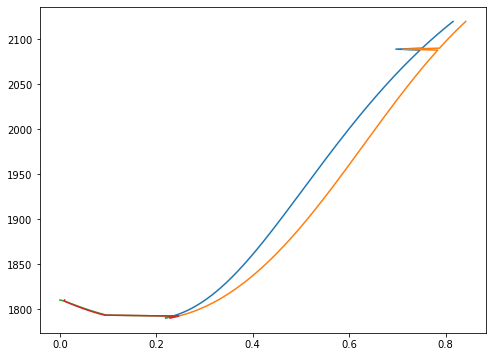

In [22]:
fig,ax = plt.subplots(figsize = (8,6))

ax.plot(results[:,0],Ts)
ax.plot(results[:,1],Ts)
ax.plot(results_1[:,0],Ts_1)
ax.plot(results_1[:,1],Ts_1)

## Value export

Exporting values for parabolic approximations

In [30]:
eq_data = np.hstack((np.array([Ts]).transpose(),results))

In [31]:
np.savetxt('eq_data.csv',eq_data,delimiter=',')